# Visualizations & Statistical Analysis with Matplotlib and Tableau

##### Description of the data:

The data describes the average scores on math and verbal and percentage of students who completed the tests by states. From the Rate column, which is the percentage of students who completed the tests, immediately you can observe that a wide range between the states. The last row shows the national average for Rate, Verbal, and Math.  

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline

##### Load the data into a list of lists:

In [2]:
with open('../data/sat_scores.csv', 'r') as f:
    sat_scores = list(csv.reader(f))

In [3]:
sat_scores

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

##### Observations:

The data looks complete and there are no obvious missing points. 50 United States, plus Washington DC. 

##### Create a data dictionary for the dataset:

In [4]:
def data_dict(list_of_lists, axis=0):
    """A function that takes a list of lists and restructures either by row or column into a 
       dictionary. If axis 0 the structue is defined by rows if 1 by columns"""
    
    header = list_of_lists[0][1:]
    
    # A list of states minus header and the last row using a list comprehension 
    index = [row[0] for row in list_of_lists[1:(len(list_of_lists)-1)]]
    
    # The scores without header and index
    data = [row[1:] for row in list_of_lists[1:(len(list_of_lists)-1)]]
    
    # The scores need to be integers for statistic analysis
    data = [[int(score) for score in row] for row in data]
    
    if axis != 0:
        columns = [[row[i] for row in data] for i in range(3)]
        
        return {column : scores for column, scores in zip(header, columns)}
    
    else:
    
        return {state : scores for state, scores in zip(index, data)} 

##### A dictionary for mapping the State to its respective value for that column 

In [5]:
data_dict(sat_scores, axis=0)

{'AK': [51, 514, 510],
 'AL': [9, 559, 554],
 'AR': [6, 562, 550],
 'AZ': [34, 523, 525],
 'CA': [51, 498, 517],
 'CO': [31, 539, 542],
 'CT': [82, 509, 510],
 'DC': [56, 482, 474],
 'DE': [67, 501, 499],
 'FL': [54, 498, 499],
 'GA': [63, 491, 489],
 'HI': [52, 485, 515],
 'IA': [5, 593, 603],
 'ID': [17, 543, 542],
 'IL': [12, 576, 589],
 'IN': [60, 499, 501],
 'KS': [9, 577, 580],
 'KY': [12, 550, 550],
 'LA': [7, 564, 562],
 'MA': [79, 511, 515],
 'MD': [65, 508, 510],
 'ME': [69, 506, 500],
 'MI': [11, 561, 572],
 'MN': [9, 580, 589],
 'MO': [8, 577, 577],
 'MS': [4, 566, 551],
 'MT': [23, 539, 539],
 'NC': [65, 493, 499],
 'ND': [4, 592, 599],
 'NE': [8, 562, 568],
 'NH': [72, 520, 516],
 'NJ': [81, 499, 513],
 'NM': [13, 551, 542],
 'NV': [33, 509, 515],
 'NY': [77, 495, 505],
 'OH': [26, 534, 439],
 'OK': [8, 567, 561],
 'OR': [55, 526, 526],
 'PA': [71, 500, 499],
 'RI': [71, 501, 499],
 'SC': [57, 486, 488],
 'SD': [4, 577, 582],
 'TN': [13, 562, 553],
 'TX': [53, 493, 499],


##### A dictionary  mapped by columns with the respective values:

In [6]:
sat_scores_dict = data_dict(sat_scores, axis=1)

##### Describe the data stats:

In [7]:
def data_stats(data_dict):
    
    print 'Rate:'
    print ' - min:', min(data_dict['Rate'])
    print ' - max:', max(data_dict['Rate'])
    print ' - mean:', np.mean(data_dict['Rate'])
    print ' - median:', np.median(data_dict['Rate'])
    print
    print 'Math:'
    print ' - min:', min(data_dict['Math'])
    print ' - max:', max(data_dict['Math'])
    print ' - mean:', np.mean(data_dict['Math'])
    print ' - median:', np.median(data_dict['Math'])
    print
    print 'Verbal:'
    print ' - min:', min(data_dict['Verbal'])
    print ' - max:', max(data_dict['Verbal'])
    print ' - mean:', np.mean(data_dict['Verbal'])
    print ' - median:', np.median(data_dict['Verbal'])

In [8]:
data_stats(sat_scores_dict)

Rate:
 - min: 4
 - max: 82
 - mean: 37.0
 - median: 33.0

Math:
 - min: 439
 - max: 603
 - mean: 531.843137255
 - median: 525.0

Verbal:
 - min: 482
 - max: 593
 - mean: 532.529411765
 - median: 527.0


##### A function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [9]:
def std_dev(dict_data):

    value = np.asarray([value for key, value in dict_data.items()])
    keys = dict_data.keys()
    
    mean = [sum(val)/len(val) for val in value]
    diff_sq = [(val - mean[i])**2 for i, val in enumerate(value)]
    std = [round((sum(diff)/len(diff))**(.5),2) for diff in diff_sq]

    return zip(keys,std)

In [10]:
std_dev(sat_scores_dict)

[('Rate', 27.28), ('Math', 35.93), ('Verbal', 33.03)]

##### Visualize data using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms:

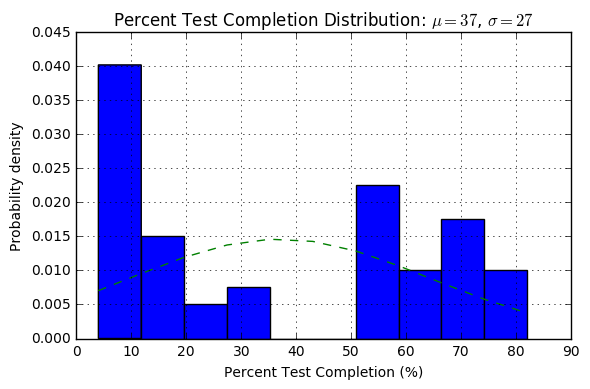

In [11]:
mu = np.mean(sat_scores_dict['Rate'])
sigma = np.std(sat_scores_dict['Rate'])
x = mu + sigma * np.random.randn(500)

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(sat_scores_dict['Rate'], 10, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Percent Test Completion (%)')
ax.set_ylabel('Probability density')
ax.set_title(r'Percent Test Completion Distribution: $\mu=%d$, $\sigma=%d$' %(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.grid(True)

plt.show()

##### Math distribution

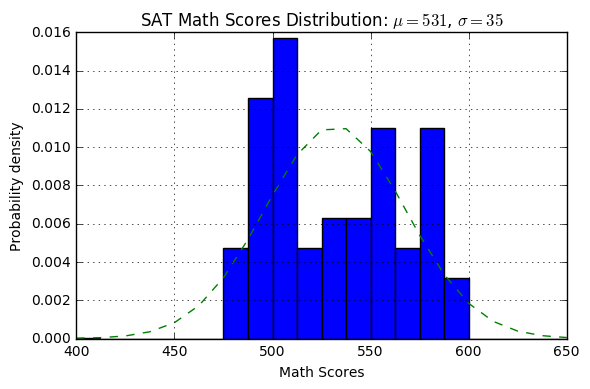

In [12]:
mu = np.mean(sat_scores_dict['Math'])
sigma = np.std(sat_scores_dict['Math'])
x = mu + sigma * np.random.randn(437)

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(sat_scores_dict['Verbal'], 20, normed=1, range=[400,650])

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Math Scores')
ax.set_ylabel('Probability density')
ax.set_title(r'SAT Math Scores Distribution: $\mu=%d$, $\sigma=%d$' %(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.grid(True)

plt.show()

##### Verbal distribution

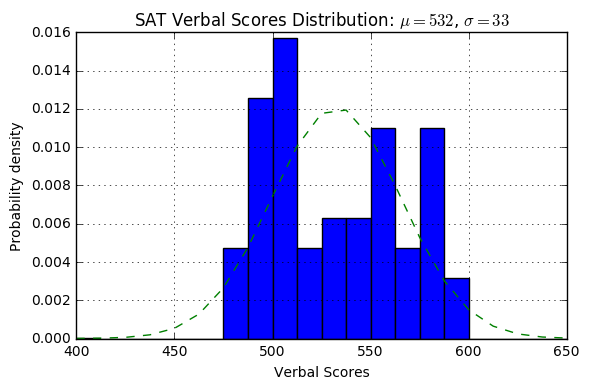

In [13]:
mu = np.mean(sat_scores_dict['Verbal'])
sigma = np.std(sat_scores_dict['Verbal'])
x = mu + sigma * np.random.randn(437)

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(sat_scores_dict['Verbal'], 20, normed=1, range=[400,650])

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Verbal Scores')
ax.set_ylabel('Probability density')
ax.set_title(r'SAT Verbal Scores Distribution: $\mu=%d$, $\sigma=%d$' %(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.grid(True)

plt.show()

##### The typical assumption for data distribution:

Typical assumption about distribution is normal. Majory of students would have average score while small portions scoring at the extremes.

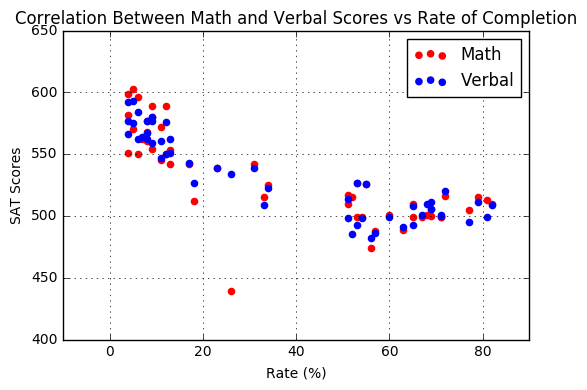

In [14]:
plt.scatter(sat_scores_dict['Rate'], sat_scores_dict['Math'], color = 'r', label='Math')
plt.scatter(sat_scores_dict['Rate'], sat_scores_dict['Verbal'], color = 'b', label='Verbal')
plt.xlabel('Rate (%)')
plt.ylabel('SAT Scores')

plt.title('Correlation Between Math and Verbal Scores vs Rate of Completion')
plt.grid(True)

plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

##### Interesting relationships to note:

From our rate distribution, we can observe that almost 40% of the states have less than 10% completion rates.

There is a negative correlation between scores and rate. As more students are completing the tests, the average scores by states decrease. 

We also see something interesting in the Math vs Rate plot: which shows an outlier state. The completion rate is less than 30% and Math score way below 450. It turns out to be ohio state. We don't have enought data to fully investigate unfortuantly.

##### Box plots for each variable:

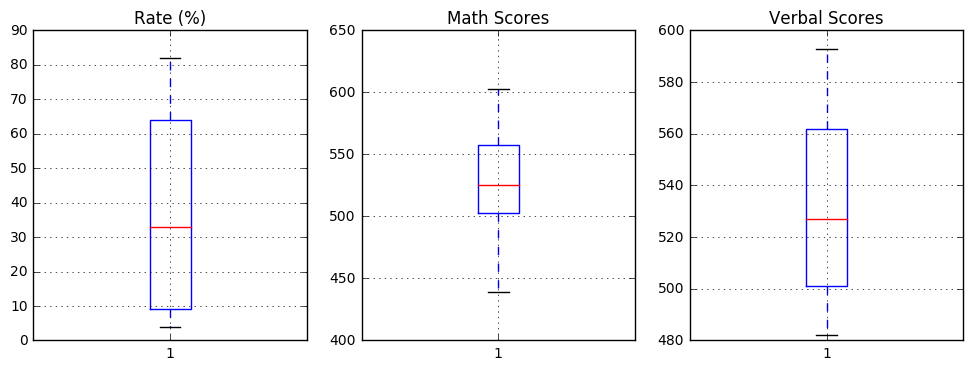

In [15]:
f, axarr = plt.subplots(ncols=3, figsize=(12,4))
axarr[0].boxplot(sat_scores_dict['Rate'])
axarr[0].set_title('Rate (%)')
axarr[0].grid(True)

axarr[1].boxplot(sat_scores_dict['Math'])
axarr[1].set_title('Math Scores')
axarr[1].grid(True)

axarr[2].boxplot(sat_scores_dict['Verbal'])
axarr[2].set_title('Verbal Scores')
axarr[2].grid(True)

fig.tight_layout()
plt.show()

##### Using Tableau to create a heat map for each variable 

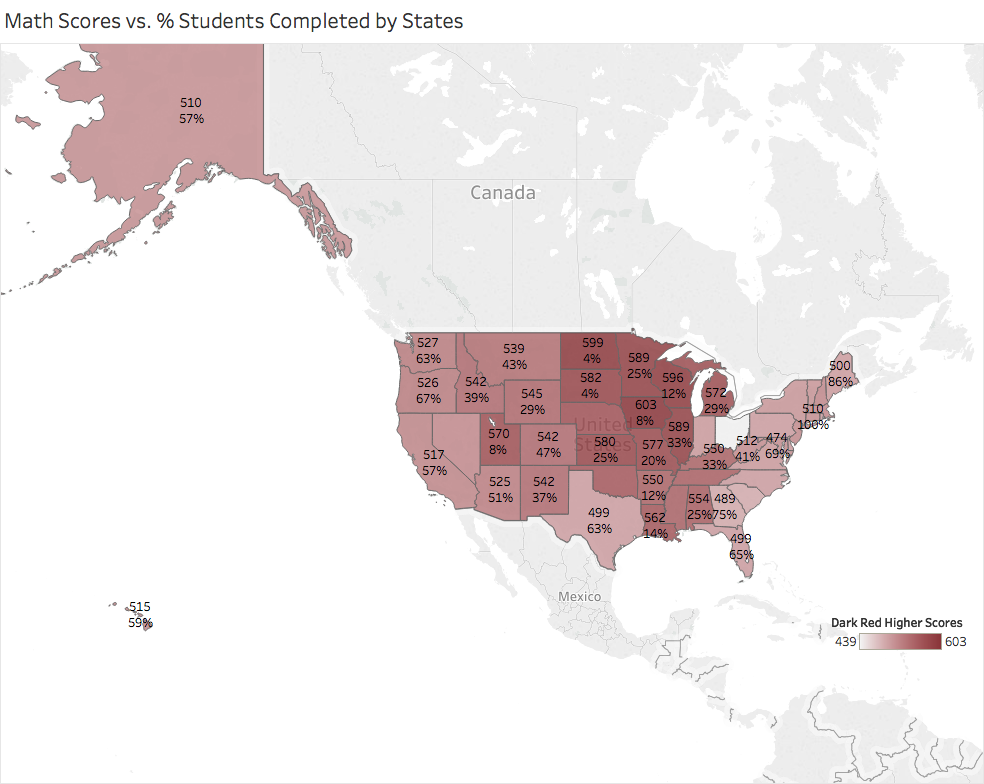

In [16]:
from IPython.display import Image
Image('../image/Math_Scores.png')

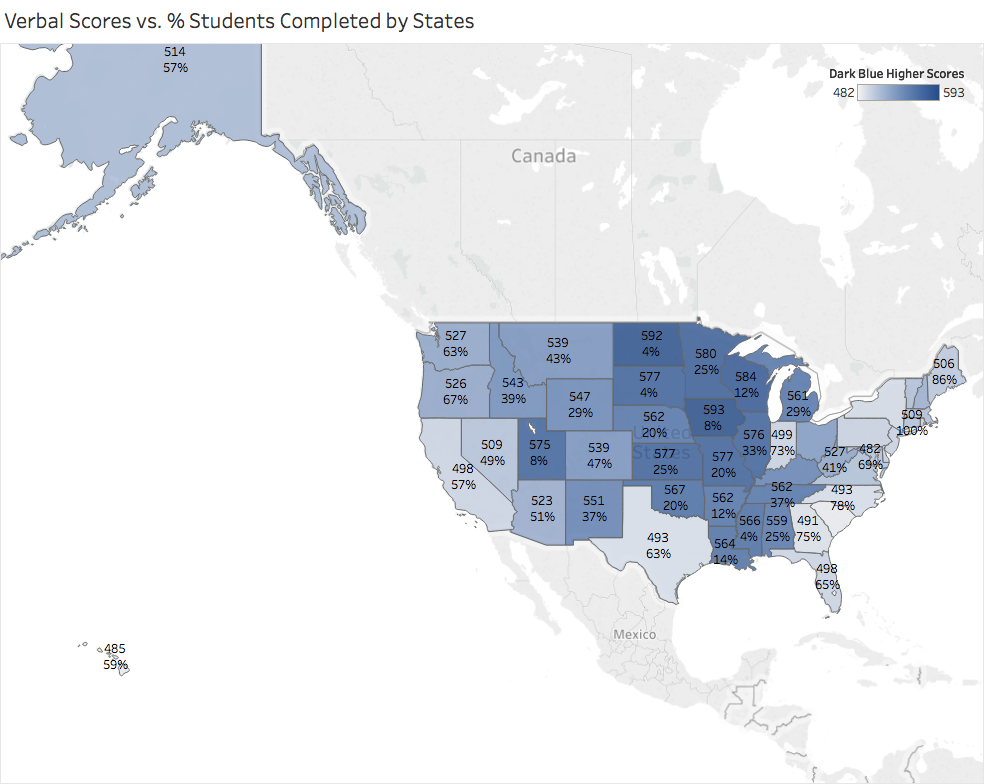

In [17]:
from IPython.display import Image
Image('../image/Verbal_Scores.png')